In [16]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# 假设 batches.meta 文件是以 pickle 格式存储的
with open('batches.meta', 'rb') as f:
    meta_data = pickle.load(f)

# 打印文件内容
num_cases_per_batch = meta_data['num_cases_per_batch']
label_names = meta_data['label_names']
num_vis = meta_data['num_vis']
print(f"num_cases_per_batch: {num_cases_per_batch}")
print(f"label_names: {label_names}")
print(f"num_vis: {num_vis}")
print(f"type: {type(label_names)}")
# batches.meta  data_batch_1  data_batch_3  data_batch_5  test_batch
# data_batch_2  data_batch_4
# {'num_cases_per_batch': 10000, 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_vis': 3072}

num_cases_per_batch: 10000
label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_vis: 3072
type: <class 'list'>


In [17]:
# 定义数据文件列表
data_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

# 遍历文件并读取内容
all_data = []
all_labels = []

for file_name in data_files:
    try:
        with open(file_name, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            
            # 提取图像数据和标签
            images = data[b'data']
            labels = data[b'labels']
            
            all_data.append(images)
            all_labels.extend(labels)
            
            print(f"文件: {file_name}")
            print(f"数据键: {data.keys()}")
            print(f"第一个样本的标签: {labels[0]}")
            print(f"第一个样本的数据: {images[0][:10]}")
            print("-" * 50)
    except Exception as e:
        print(f"读取文件 {file_name} 时出错: {e}")

# 合并所有批次的数据
all_data = np.vstack(all_data)
all_labels = np.array(all_labels)

文件: data_batch_1
数据键: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
第一个样本的标签: 6
第一个样本的数据: [ 59  43  50  68  98 119 139 145 149 149]
--------------------------------------------------
文件: data_batch_2
数据键: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
第一个样本的标签: 1
第一个样本的数据: [35 27 25 26 24 22 23 25 25 24]
--------------------------------------------------
文件: data_batch_3
数据键: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
第一个样本的标签: 8
第一个样本的数据: [26 17 13 13 13 14 14 15 14 10]
--------------------------------------------------
文件: data_batch_4
数据键: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
第一个样本的标签: 0
第一个样本的数据: [178 178 178 178 179 179 179 180 180 180]
--------------------------------------------------
文件: data_batch_5
数据键: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
第一个样本的标签: 1
第一个样本的数据: [255 252 253 250 238 233 245 241 232 238]
--------------------------------------------------


In [19]:
# 定义数据文件列表
test_files = ['test_batch']

# 遍历文件并读取内容
test_data = []
test_labels = []

for file_name in test_files:
    try:
        with open(file_name, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            
            # 提取图像数据和标签
            images = data[b'data']
            labels = data[b'labels']
            
            test_data.append(images)
            test_labels.extend(labels)
            
            print(f"文件: {file_name}")
            print(f"数据键: {data.keys()}")
            print(f"第一个样本的标签: {labels[0]}")
            print(f"第一个样本的数据: {images[0][:10]}")
            print("-" * 50)
    except Exception as e:
        print(f"读取文件 {file_name} 时出错: {e}")

# 合并所有批次的数据
test_data = np.vstack(test_data)
test_labels = np.array(test_labels)

文件: test_batch
数据键: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
第一个样本的标签: 3
第一个样本的数据: [158 159 165 166 160 156 162 159 158 159]
--------------------------------------------------


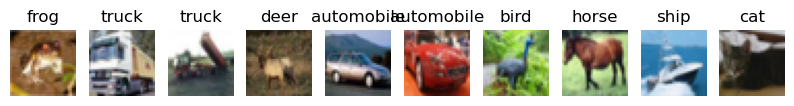

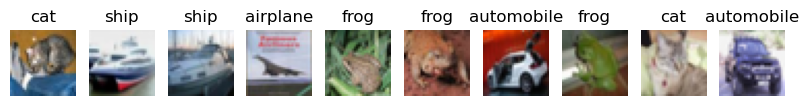

In [20]:
# 定义函数以展示图像
def show_images(images, labels, label_names, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        img = images[i].reshape(3, 32, 32).transpose(1, 2, 0)  # 转换为 (32, 32, 3) 格式
        plt.imshow(img)
        plt.title(label_names[labels[i]])
        plt.axis('off')
    plt.show()

# 展示前10张图像
show_images(all_data, all_labels, label_names, num_images=10)
show_images(test_data, test_labels, label_names, num_images=10)

In [21]:
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

    def train_model(self, train_loader, criterion, optimizer, num_epochs):
        for epoch in range(num_epochs):
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.forward(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')